**Fraud Detection- Project**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('bank_transactions_data_2.csv')
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

# Data Cleaning And Preproccesing

In [26]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionDate'].dtype

dtype('<M8[ns]')

In [27]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])
df['PreviousTransactionDate'].dtype

dtype('<M8[ns]')

In [28]:
df = pd.get_dummies(df, columns=['Channel'])

In [29]:
df = pd.get_dummies(df, columns=['TransactionType'])

In [30]:
df.head(21)

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Channel_ATM,Channel_Branch,Channel_Online,TransactionType_Credit,TransactionType_Debit
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,True,False,False,False,True
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,True,False,False,False,True
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,19,Student,56,1,1122.35,2024-11-04 08:07:04,False,False,True,False,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,26,Student,25,1,8569.06,2024-11-04 08:09:06,False,False,True,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,26,Student,198,1,7429.40,2024-11-04 08:06:39,False,False,True,True,False
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Oklahoma City,D000579,117.67.192.211,M054,18,Student,172,1,781.68,2024-11-04 08:06:36,True,False,False,False,True
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Seattle,D000241,140.212.253.222,M019,37,Doctor,139,1,13316.71,2024-11-04 08:10:09,True,False,False,True,False
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Indianapolis,D000500,92.214.76.157,M020,67,Retired,291,1,2796.24,2024-11-04 08:10:55,False,True,False,True,False
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Detroit,D000690,24.148.92.177,M035,51,Engineer,86,1,9095.14,2024-11-04 08:11:14,False,True,False,True,False
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Nashville,D000199,32.169.88.41,M007,55,Doctor,120,1,1021.88,2024-11-04 08:06:32,True,False,False,False,True


In [31]:
df = pd.get_dummies(df, columns=['CustomerOccupation'])
df.head(11)

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,...,PreviousTransactionDate,Channel_ATM,Channel_Branch,Channel_Online,TransactionType_Credit,TransactionType_Debit,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,70,81,...,2024-11-04 08:08:08,True,False,False,False,True,True,False,False,False
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,68,141,...,2024-11-04 08:09:35,True,False,False,False,True,True,False,False,False
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,19,56,...,2024-11-04 08:07:04,False,False,True,False,True,False,False,False,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,26,25,...,2024-11-04 08:09:06,False,False,True,False,True,False,False,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,26,198,...,2024-11-04 08:06:39,False,False,True,True,False,False,False,False,True
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Oklahoma City,D000579,117.67.192.211,M054,18,172,...,2024-11-04 08:06:36,True,False,False,False,True,False,False,False,True
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Seattle,D000241,140.212.253.222,M019,37,139,...,2024-11-04 08:10:09,True,False,False,True,False,True,False,False,False
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Indianapolis,D000500,92.214.76.157,M020,67,291,...,2024-11-04 08:10:55,False,True,False,True,False,False,False,True,False
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Detroit,D000690,24.148.92.177,M035,51,86,...,2024-11-04 08:11:14,False,True,False,True,False,False,True,False,False
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Nashville,D000199,32.169.88.41,M007,55,120,...,2024-11-04 08:06:32,True,False,False,False,True,True,False,False,False


In [32]:
df.isnull().sum()

TransactionID                  0
AccountID                      0
TransactionAmount              0
TransactionDate                0
Location                       0
DeviceID                       0
IP Address                     0
MerchantID                     0
CustomerAge                    0
TransactionDuration            0
LoginAttempts                  0
AccountBalance                 0
PreviousTransactionDate        0
Channel_ATM                    0
Channel_Branch                 0
Channel_Online                 0
TransactionType_Credit         0
TransactionType_Debit          0
CustomerOccupation_Doctor      0
CustomerOccupation_Engineer    0
CustomerOccupation_Retired     0
CustomerOccupation_Student     0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df = df.rename(columns={"Channel_ATM": "Atm", "Channel_Branch": "Branch", "Channel_Online": "Online"})

In [35]:
df = df.rename(columns={"TransactionType_Credit": "CreditCard", "TransactionType_Debit": "DebitCard", "CustomerOccupation_Doctor": "Doctor","CustomerOccupation_Engineer" : "Engineer","CustomerOccupation_Retired":"Retired","CustomerOccupation_Student":"Student","ATM":"Atm"})
df.head(11)

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,...,PreviousTransactionDate,Atm,Branch,Online,CreditCard,DebitCard,Doctor,Engineer,Retired,Student
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,70,81,...,2024-11-04 08:08:08,True,False,False,False,True,True,False,False,False
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,68,141,...,2024-11-04 08:09:35,True,False,False,False,True,True,False,False,False
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,19,56,...,2024-11-04 08:07:04,False,False,True,False,True,False,False,False,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,26,25,...,2024-11-04 08:09:06,False,False,True,False,True,False,False,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,26,198,...,2024-11-04 08:06:39,False,False,True,True,False,False,False,False,True
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Oklahoma City,D000579,117.67.192.211,M054,18,172,...,2024-11-04 08:06:36,True,False,False,False,True,False,False,False,True
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Seattle,D000241,140.212.253.222,M019,37,139,...,2024-11-04 08:10:09,True,False,False,True,False,True,False,False,False
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Indianapolis,D000500,92.214.76.157,M020,67,291,...,2024-11-04 08:10:55,False,True,False,True,False,False,False,True,False
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Detroit,D000690,24.148.92.177,M035,51,86,...,2024-11-04 08:11:14,False,True,False,True,False,False,True,False,False
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Nashville,D000199,32.169.88.41,M007,55,120,...,2024-11-04 08:06:32,True,False,False,False,True,True,False,False,False


In [36]:
df = df.drop('TransactionID', axis=1)


In [37]:
df = df.drop('AccountID', axis=1)


In [38]:
df = df.drop('DeviceID', axis=1)


In [39]:
df.head(11)

,TransactionAmount,TransactionDate,Location,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Atm,Branch,Online,CreditCard,DebitCard,Doctor,Engineer,Retired,Student
0,14.09,2023-04-11 16:29:14,San Diego,162.198.218.92,M015,70,81,1,5112.21,2024-11-04 08:08:08,True,False,False,False,True,True,False,False,False
1,376.24,2023-06-27 16:44:19,Houston,13.149.61.4,M052,68,141,1,13758.91,2024-11-04 08:09:35,True,False,False,False,True,True,False,False,False
2,126.29,2023-07-10 18:16:08,Mesa,215.97.143.157,M009,19,56,1,1122.35,2024-11-04 08:07:04,False,False,True,False,True,False,False,False,True
3,184.50,2023-05-05 16:32:11,Raleigh,200.13.225.150,M002,26,25,1,8569.06,2024-11-04 08:09:06,False,False,True,False,True,False,False,False,True
4,13.45,2023-10-16 17:51:24,Atlanta,65.164.3.100,M091,26,198,1,7429.40,2024-11-04 08:06:39,False,False,True,True,False,False,False,False,True
5,92.15,2023-04-03 17:15:01,Oklahoma City,117.67.192.211,M054,18,172,1,781.68,2024-11-04 08:06:36,True,False,False,False,True,False,False,False,True
6,7.08,2023-02-15 16:36:48,Seattle,140.212.253.222,M019,37,139,1,13316.71,2024-11-04 08:10:09,True,False,False,True,False,True,False,False,False
7,171.42,2023-05-08 17:47:59,Indianapolis,92.214.76.157,M020,67,291,1,2796.24,2024-11-04 08:10:55,False,True,False,True,False,False,False,True,False
8,106.23,2023-03-21 16:59:46,Detroit,24.148.92.177,M035,51,86,1,9095.14,2024-11-04 08:11:14,False,True,False,True,False,False,True,False,False
9,815.96,2023-03-31 16:06:57,Nashville,32.169.88.41,M007,55,120,1,1021.88,2024-11-04 08:06:32,True,False,False,False,True,True,False,False,False


In [40]:
print(df.shape)
df.info()
df.describe()

(2512, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2512 non-null   float64       
 1   TransactionDate          2512 non-null   datetime64[ns]
 2   Location                 2512 non-null   object        
 3   IP Address               2512 non-null   object        
 4   MerchantID               2512 non-null   object        
 5   CustomerAge              2512 non-null   int64         
 6   TransactionDuration      2512 non-null   int64         
 7   LoginAttempts            2512 non-null   int64         
 8   AccountBalance           2512 non-null   float64       
 9   PreviousTransactionDate  2512 non-null   datetime64[ns]
 10  Atm                      2512 non-null   bool          
 11  Branch                   2512 non-null   bool          
 12  Online                 

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN


In [41]:
# Checking unique values for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

Location: 43 unique values
IP Address: 592 unique values
MerchantID: 100 unique values


# EDA

**Univariate Analysis**

- Numerical Features

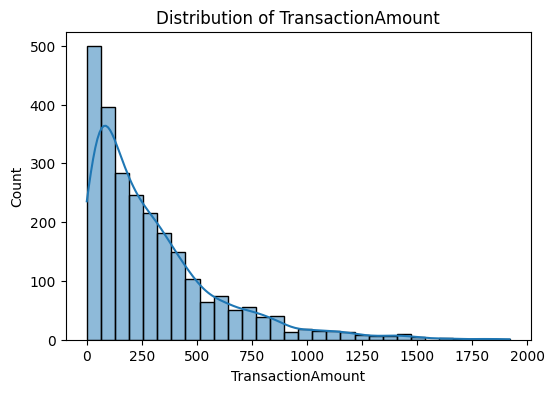

<Figure size 640x480 with 0 Axes>

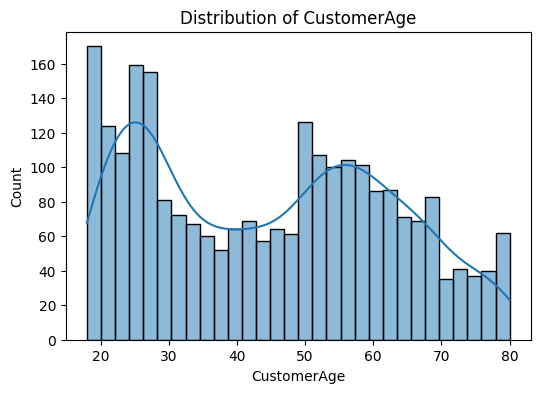

<Figure size 640x480 with 0 Axes>

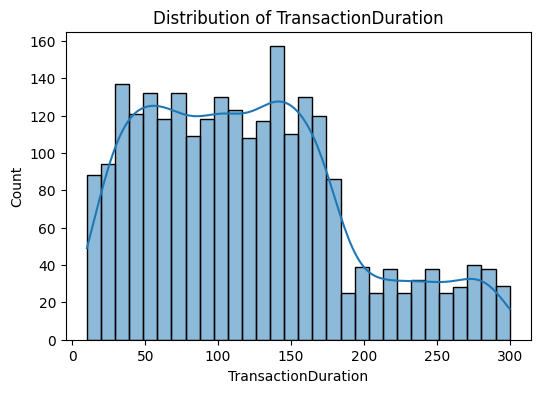

<Figure size 640x480 with 0 Axes>

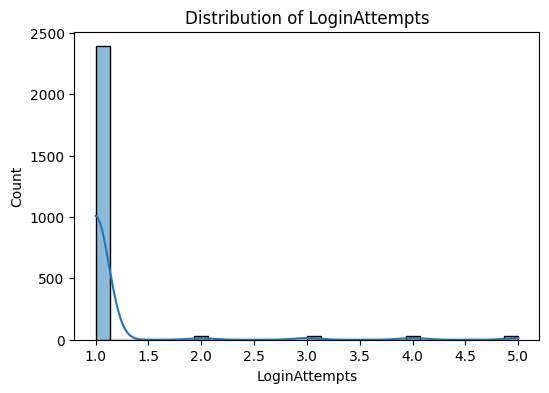

<Figure size 640x480 with 0 Axes>

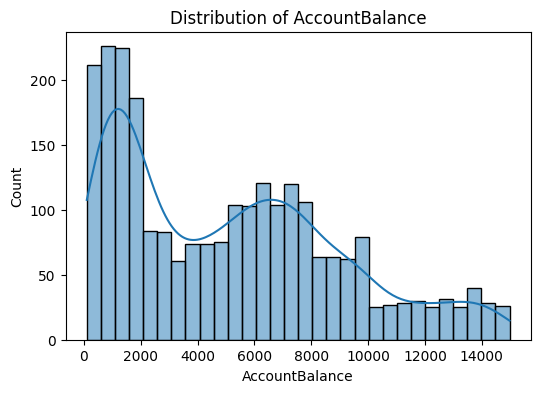

<Figure size 640x480 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()
    plt.tight_layout()

- Categorical Features

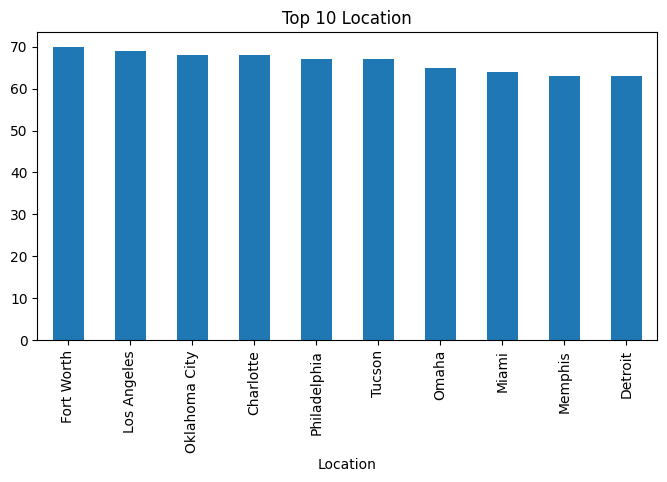

<Figure size 640x480 with 0 Axes>

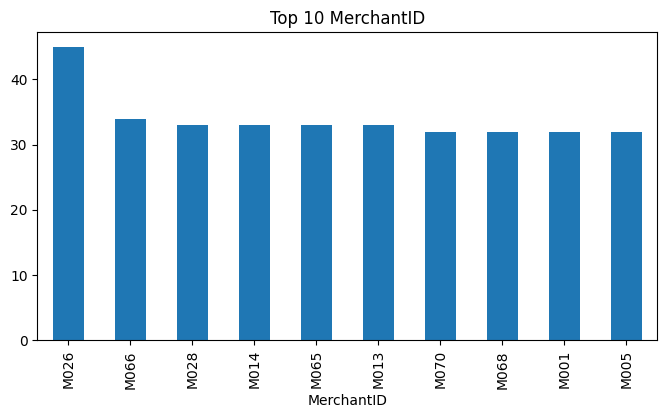

<Figure size 640x480 with 0 Axes>

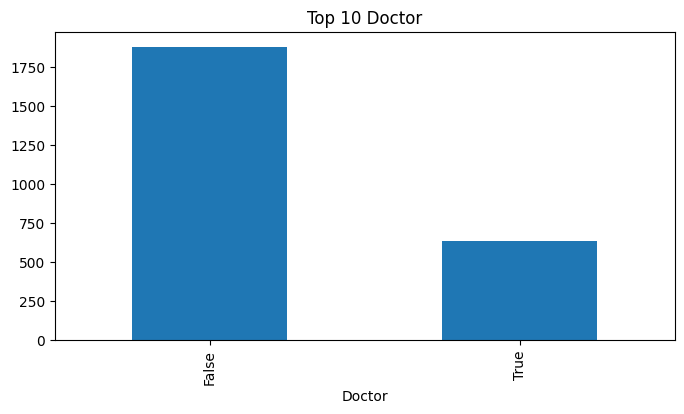

<Figure size 640x480 with 0 Axes>

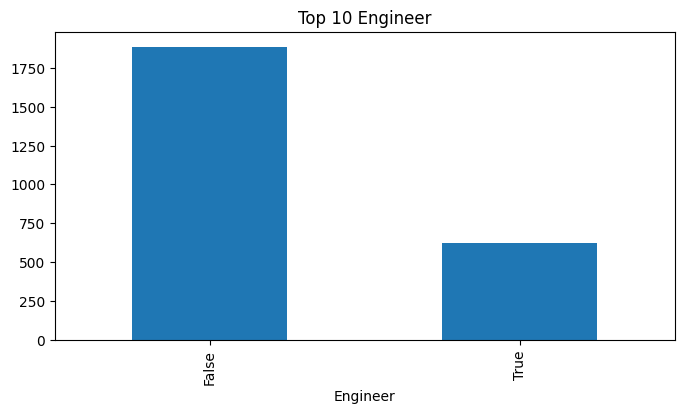

<Figure size 640x480 with 0 Axes>

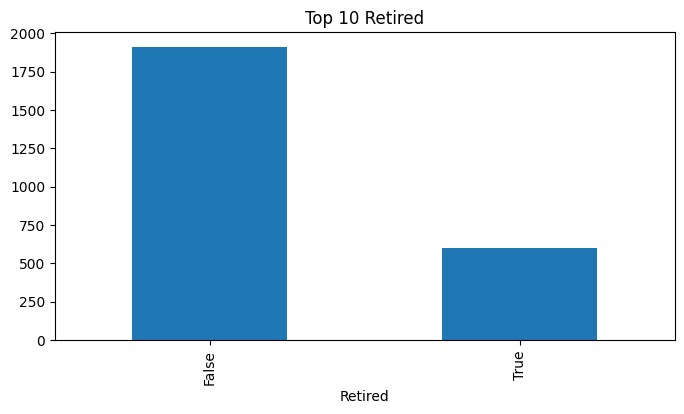

<Figure size 640x480 with 0 Axes>

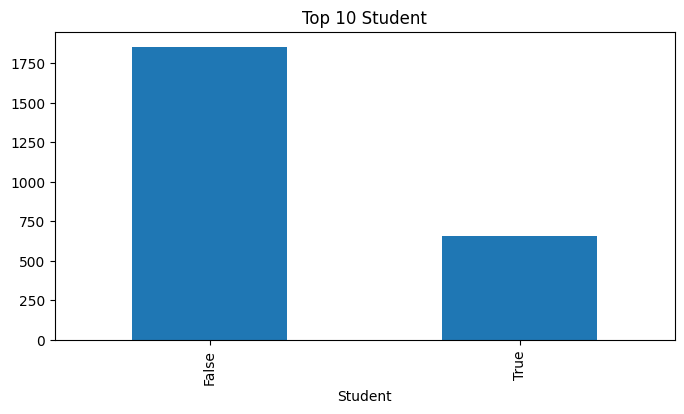

<Figure size 640x480 with 0 Axes>

In [43]:
cat_cols = ['Location', 'MerchantID', 'Doctor',	'Engineer',	'Retired',	'Student']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 {col}")
    plt.show()
    plt.tight_layout()

**Bivariate Analysis**

- Transaction Amount vs Age / Occupation

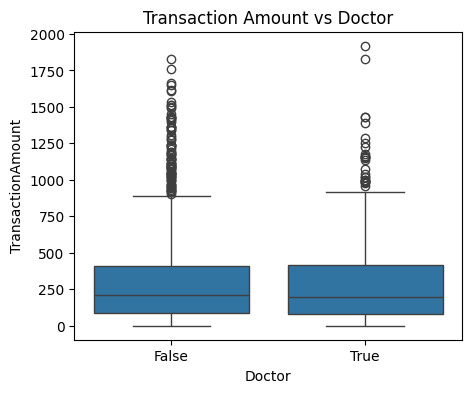

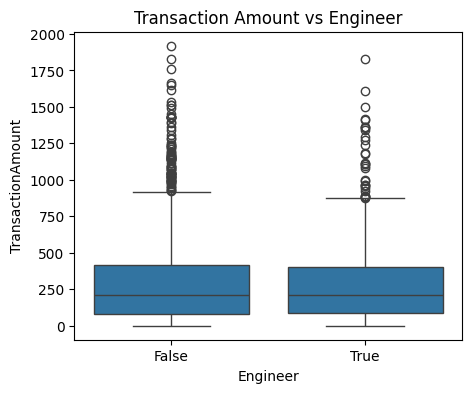

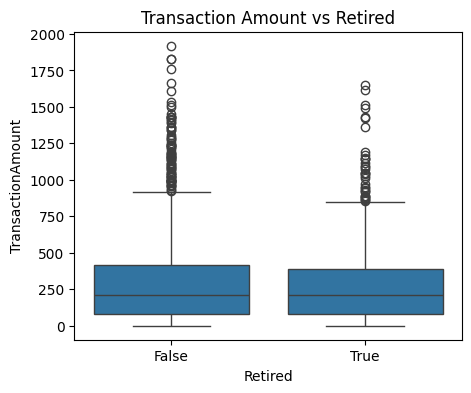

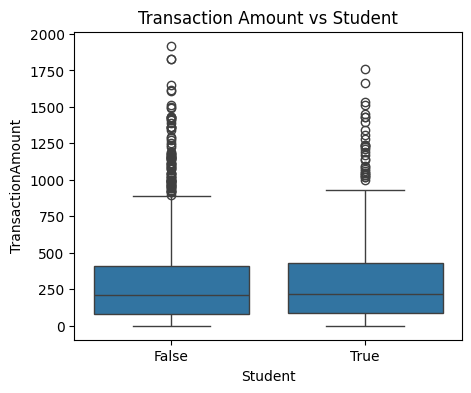

In [46]:
# Occupation columns
occupation_cols = ['Doctor','Engineer','Retired','Student']

# Loop through each occupation column and plot a boxplot
for col in occupation_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=col, y='TransactionAmount', data=df)
    plt.title(f"Transaction Amount vs {col}")
    plt.show()

- Correlation Heatmap

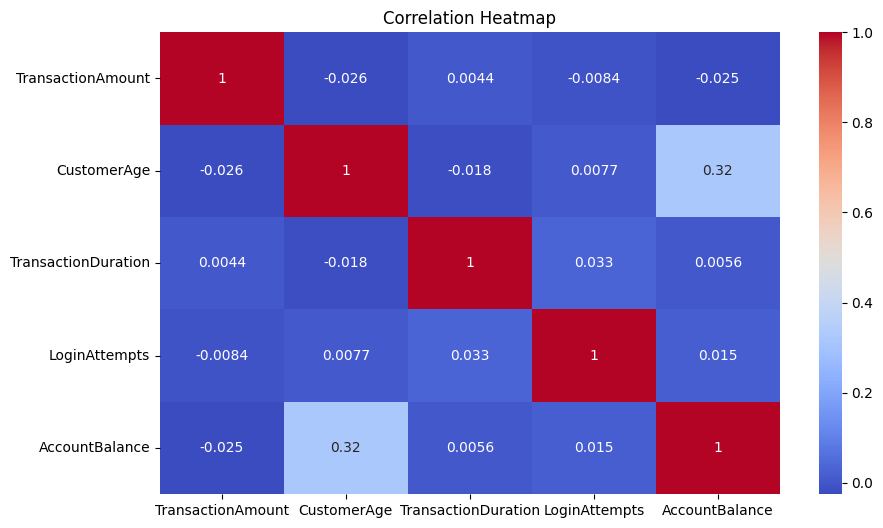

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Time-based Analysis**

- Transactions over time

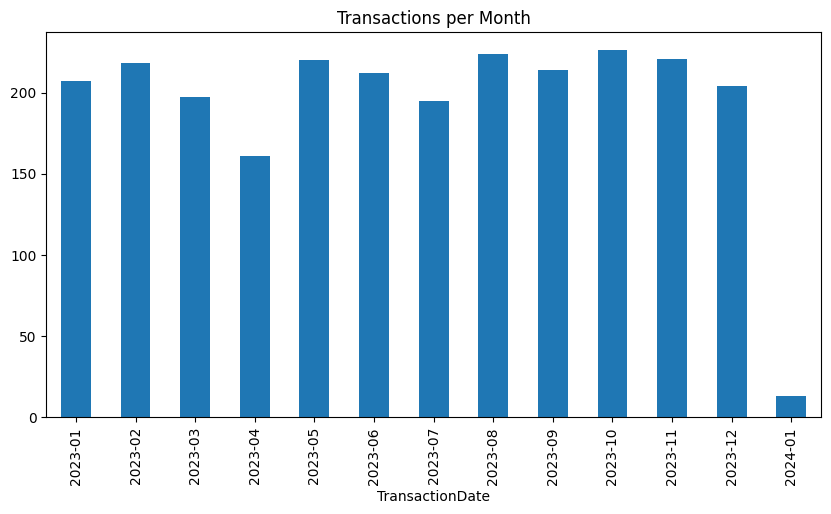

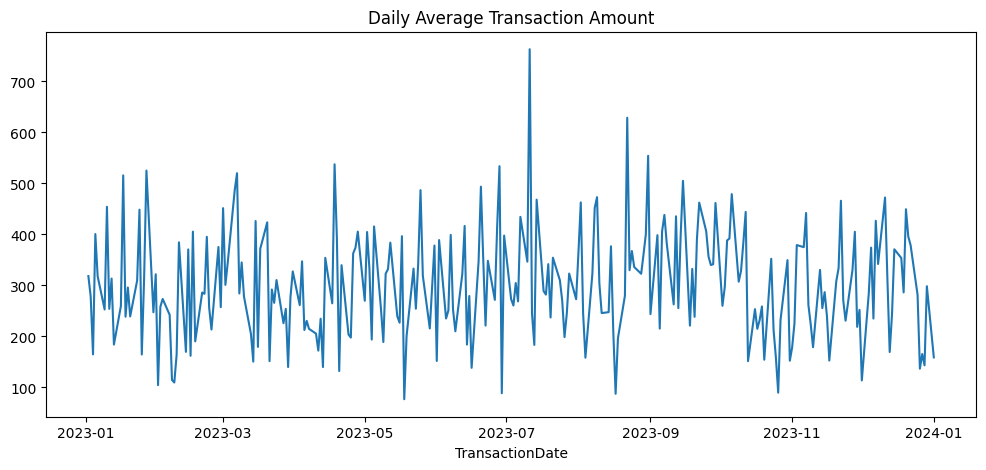

In [48]:
df['TransactionDate'].dt.to_period("M").value_counts().sort_index().plot(kind="bar", figsize=(10,5))
plt.title("Transactions per Month")
plt.show()

# Average transaction amount over time
df.groupby(df['TransactionDate'].dt.date)['TransactionAmount'].mean().plot(figsize=(12,5))
plt.title("Daily Average Transaction Amount")
plt.show()

**Channel & Transaction Type**

In [49]:
df.head(6)

,TransactionAmount,TransactionDate,Location,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Atm,Branch,Online,CreditCard,DebitCard,Doctor,Engineer,Retired,Student
0,14.09,2023-04-11 16:29:14,San Diego,162.198.218.92,M015,70,81,1,5112.21,2024-11-04 08:08:08,True,False,False,False,True,True,False,False,False
1,376.24,2023-06-27 16:44:19,Houston,13.149.61.4,M052,68,141,1,13758.91,2024-11-04 08:09:35,True,False,False,False,True,True,False,False,False
2,126.29,2023-07-10 18:16:08,Mesa,215.97.143.157,M009,19,56,1,1122.35,2024-11-04 08:07:04,False,False,True,False,True,False,False,False,True
3,184.50,2023-05-05 16:32:11,Raleigh,200.13.225.150,M002,26,25,1,8569.06,2024-11-04 08:09:06,False,False,True,False,True,False,False,False,True
4,13.45,2023-10-16 17:51:24,Atlanta,65.164.3.100,M091,26,198,1,7429.40,2024-11-04 08:06:39,False,False,True,True,False,False,False,False,True
5,92.15,2023-04-03 17:15:01,Oklahoma City,117.67.192.211,M054,18,172,1,781.68,2024-11-04 08:06:36,True,False,False,False,True,False,False,False,True


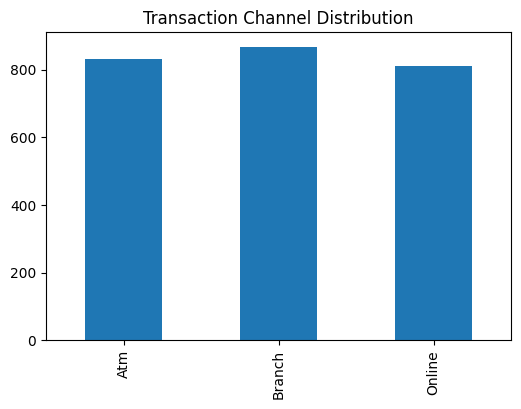

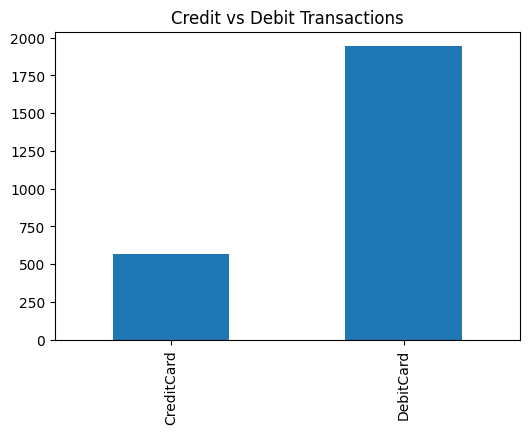

In [50]:
channel_cols = ['Atm', 'Branch', 'Online']
type_cols = ['CreditCard','DebitCard']

# Channels
df[channel_cols].sum().plot(kind='bar', figsize=(6,4))
plt.title("Transaction Channel Distribution")
plt.show()

# Credit vs Debit
df[type_cols].sum().plot(kind='bar', figsize=(6,4))
plt.title("Credit vs Debit Transactions")
plt.show()

**Account Activity**

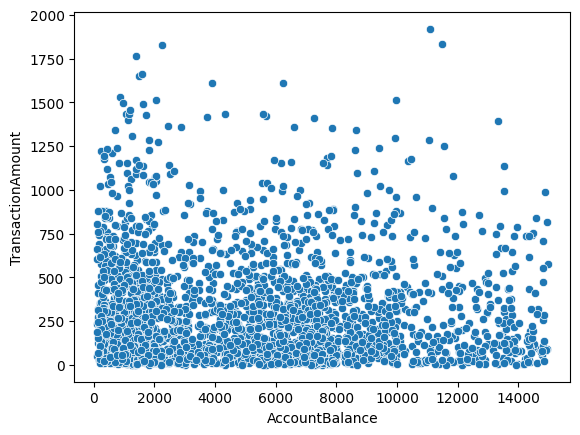

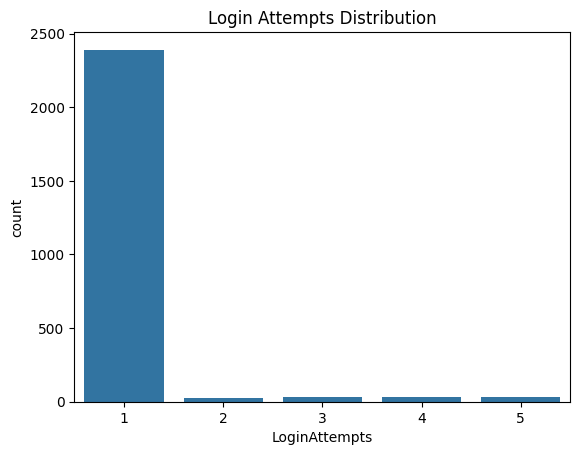

In [51]:
# Balance vs Transaction Amount
sns.scatterplot(x='AccountBalance', y='TransactionAmount', data=df)
plt.show()

# Login Attempts distribution
sns.countplot(x='LoginAttempts', data=df)
plt.title("Login Attempts Distribution")
plt.show()

**Outlier Analysis**

- TransactionAmount, TransactionDuration, LoginAttempts, AccountBalance can have extreme values because of numerical data. Taking an example of TransactionAmount.

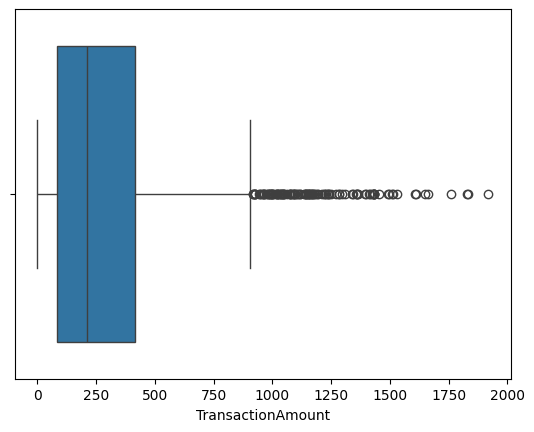

Number of outliers in TransactionAmount: 113


In [52]:
# Boxplot for outlier detection
sns.boxplot(x=df['TransactionAmount'])
plt.show()

# IQR method
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['TransactionAmount'] < (Q1 - 1.5 * IQR)) |
              (df['TransactionAmount'] > (Q3 + 1.5 * IQR))]

print("Number of outliers in TransactionAmount:", outliers.shape[0])

**Skewness Analysis**

- Transaction data has right-skew.

- Skewed features can affect statistical tests and ML models, so used log transformation.

TransactionAmount      1.740107
TransactionDuration    0.599432
LoginAttempts          5.173491
AccountBalance         0.601201
dtype: float64


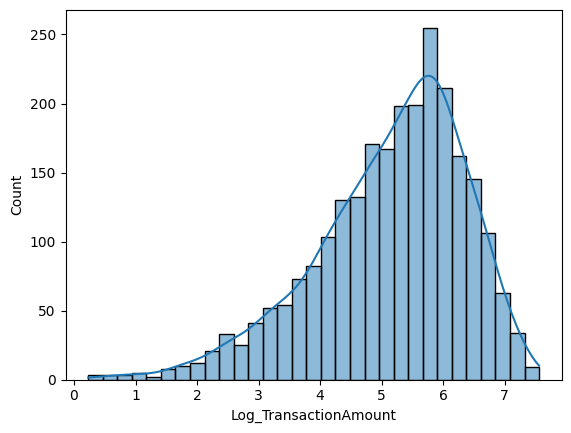

In [53]:
# Skewness check
print(df[['TransactionAmount','TransactionDuration','LoginAttempts','AccountBalance']].skew())

# Log transformation for skewed features
df['Log_TransactionAmount'] = np.log1p(df['TransactionAmount'])
sns.histplot(df['Log_TransactionAmount'], kde=True)
plt.show()

In [54]:
df.head(11)

,TransactionAmount,TransactionDate,Location,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Atm,Branch,Online,CreditCard,DebitCard,Doctor,Engineer,Retired,Student,Log_TransactionAmount
0,14.09,2023-04-11 16:29:14,San Diego,162.198.218.92,M015,70,81,1,5112.21,2024-11-04 08:08:08,True,False,False,False,True,True,False,False,False,2.714032
1,376.24,2023-06-27 16:44:19,Houston,13.149.61.4,M052,68,141,1,13758.91,2024-11-04 08:09:35,True,False,False,False,True,True,False,False,False,5.932882
2,126.29,2023-07-10 18:16:08,Mesa,215.97.143.157,M009,19,56,1,1122.35,2024-11-04 08:07:04,False,False,True,False,True,False,False,False,True,4.846468
3,184.50,2023-05-05 16:32:11,Raleigh,200.13.225.150,M002,26,25,1,8569.06,2024-11-04 08:09:06,False,False,True,False,True,False,False,False,True,5.223055
4,13.45,2023-10-16 17:51:24,Atlanta,65.164.3.100,M091,26,198,1,7429.40,2024-11-04 08:06:39,False,False,True,True,False,False,False,False,True,2.670694
5,92.15,2023-04-03 17:15:01,Oklahoma City,117.67.192.211,M054,18,172,1,781.68,2024-11-04 08:06:36,True,False,False,False,True,False,False,False,True,4.534211
6,7.08,2023-02-15 16:36:48,Seattle,140.212.253.222,M019,37,139,1,13316.71,2024-11-04 08:10:09,True,False,False,True,False,True,False,False,False,2.089392
7,171.42,2023-05-08 17:47:59,Indianapolis,92.214.76.157,M020,67,291,1,2796.24,2024-11-04 08:10:55,False,True,False,True,False,False,False,True,False,5.149933
8,106.23,2023-03-21 16:59:46,Detroit,24.148.92.177,M035,51,86,1,9095.14,2024-11-04 08:11:14,False,True,False,True,False,False,True,False,False,4.674976
9,815.96,2023-03-31 16:06:57,Nashville,32.169.88.41,M007,55,120,1,1021.88,2024-11-04 08:06:32,True,False,False,False,True,True,False,False,False,6.705590


In [55]:
df.drop([ 'IP Address', 'Location', 'MerchantID'], axis=1, inplace=True)


In [56]:
bool_cols = ['Atm', 'Branch', 'Online', 'CreditCard', 'DebitCard', 
             'Doctor', 'Engineer', 'Retired', 'Student']
df[bool_cols] = df[bool_cols].astype(int)


In [57]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df['Trans_Hour'] = df['TransactionDate'].dt.hour
df['Trans_Day'] = df['TransactionDate'].dt.day
df['Trans_Month'] = df['TransactionDate'].dt.month
df['Trans_Weekday'] = df['TransactionDate'].dt.weekday

df['Days_SincePrev'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days

df.drop(['TransactionDate', 'PreviousTransactionDate'], axis=1, inplace=True)


In [58]:
df.head(11)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Atm,Branch,Online,CreditCard,DebitCard,Doctor,Engineer,Retired,Student,Log_TransactionAmount,Trans_Hour,Trans_Day,Trans_Month,Trans_Weekday,Days_SincePrev
0,14.09,70,81,1,5112.21,1,0,0,0,1,1,0,0,0,2.714032,16,11,4,1,-573
1,376.24,68,141,1,13758.91,1,0,0,0,1,1,0,0,0,5.932882,16,27,6,1,-496
2,126.29,19,56,1,1122.35,0,0,1,0,1,0,0,0,1,4.846468,18,10,7,0,-483
3,184.50,26,25,1,8569.06,0,0,1,0,1,0,0,0,1,5.223055,16,5,5,4,-549
4,13.45,26,198,1,7429.40,0,0,1,1,0,0,0,0,1,2.670694,17,16,10,0,-385
5,92.15,18,172,1,781.68,1,0,0,0,1,0,0,0,1,4.534211,17,3,4,0,-581
6,7.08,37,139,1,13316.71,1,0,0,1,0,1,0,0,0,2.089392,16,15,2,2,-628
7,171.42,67,291,1,2796.24,0,1,0,1,0,0,0,1,0,5.149933,17,8,5,0,-546
8,106.23,51,86,1,9095.14,0,1,0,1,0,0,1,0,0,4.674976,16,21,3,1,-594
9,815.96,55,120,1,1021.88,1,0,0,0,1,1,0,0,0,6.705590,16,31,3,4,-584


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TransactionAmount      2512 non-null   float64
 1   CustomerAge            2512 non-null   int64  
 2   TransactionDuration    2512 non-null   int64  
 3   LoginAttempts          2512 non-null   int64  
 4   AccountBalance         2512 non-null   float64
 5   Atm                    2512 non-null   int64  
 6   Branch                 2512 non-null   int64  
 7   Online                 2512 non-null   int64  
 8   CreditCard             2512 non-null   int64  
 9   DebitCard              2512 non-null   int64  
 10  Doctor                 2512 non-null   int64  
 11  Engineer               2512 non-null   int64  
 12  Retired                2512 non-null   int64  
 13  Student                2512 non-null   int64  
 14  Log_TransactionAmount  2512 non-null   float64
 15  Tran

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Keep df as the original, create df_encode as the scaled copy
df_encode = df.copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encode) 

df_encode = pd.DataFrame(df_scaled, columns=df.columns)

df_encode.head(11)


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Atm,Branch,Online,CreditCard,DebitCard,Doctor,Engineer,Retired,Student,Log_TransactionAmount,Trans_Hour,Trans_Day,Trans_Month,Trans_Weekday,Days_SincePrev
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537,1.419720,-0.726623,-0.690491,-0.540538,0.540538,1.726552,-0.575512,-0.559572,-0.595128,-1.994061,-0.856729,-0.551082,-0.737432,-0.296655,-0.800526
1,0.269440,1.311287,0.305314,-0.206794,2.216472,1.419720,-0.726623,-0.690491,-0.540538,0.540538,1.726552,-0.575512,-0.559572,-0.595128,0.646895,-0.856729,1.275496,-0.161875,-0.296655,-0.076554
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534,-0.704364,-0.726623,1.448244,-0.540538,0.540538,-0.579189,-0.575512,-0.559572,1.680309,-0.244470,1.879574,-0.665243,0.125903,-0.958464,0.045675
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797,-0.704364,-0.726623,1.448244,-0.540538,0.540538,-0.579189,-0.575512,-0.559572,1.680309,0.064507,-0.856729,-1.236049,-0.449653,1.688773,-0.574872
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589,-0.704364,-0.726623,1.448244,1.850010,-1.850010,-0.579189,-0.575512,-0.559572,1.680309,-2.029619,0.511423,0.019724,0.989238,-0.958464,0.967094
5,-0.703844,-1.499493,0.748489,-0.206794,-1.110882,1.419720,-0.726623,-0.690491,-0.540538,0.540538,-0.579189,-0.575512,-0.559572,1.680309,-0.500666,0.511423,-1.464371,-0.737432,-0.958464,-0.875744
6,-0.995292,-0.431397,0.276722,-0.206794,2.103092,1.419720,-0.726623,-0.690491,1.850010,-1.850010,1.726552,-0.575512,-0.559572,-0.595128,-2.506558,-0.856729,-0.094437,-1.312988,0.365154,-1.317649
7,-0.432268,1.255071,2.449708,-0.206794,-0.594350,-0.704364,1.376230,-0.690491,1.850010,-1.850010,-0.579189,-0.575512,1.787080,-0.595128,0.004513,0.511423,-0.893565,-0.449653,-0.958464,-0.546666
8,-0.655607,0.355622,-0.480963,-0.206794,1.020684,-0.704364,1.376230,-0.690491,1.850010,-1.850010,-0.579189,1.737585,-0.559572,-0.595128,-0.385173,-0.856729,0.590529,-1.025210,-0.296655,-0.997973
9,1.775907,0.580484,0.005099,-0.206794,-1.049295,1.419720,-0.726623,-0.690491,-0.540538,0.540538,1.726552,-0.575512,-0.559572,-0.595128,1.280877,-0.856729,1.732141,-1.025210,1.688773,-0.903950


In [62]:
df_encode.isnull().sum()

TransactionAmount        0
CustomerAge              0
TransactionDuration      0
LoginAttempts            0
AccountBalance           0
Atm                      0
Branch                   0
Online                   0
CreditCard               0
DebitCard                0
Doctor                   0
Engineer                 0
Retired                  0
Student                  0
Log_TransactionAmount    0
Trans_Hour               0
Trans_Day                0
Trans_Month              0
Trans_Weekday            0
Days_SincePrev           0
dtype: int64

In [63]:
df_encode.duplicated().sum()

np.int64(0)

In [64]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TransactionAmount      2512 non-null   float64
 1   CustomerAge            2512 non-null   float64
 2   TransactionDuration    2512 non-null   float64
 3   LoginAttempts          2512 non-null   float64
 4   AccountBalance         2512 non-null   float64
 5   Atm                    2512 non-null   float64
 6   Branch                 2512 non-null   float64
 7   Online                 2512 non-null   float64
 8   CreditCard             2512 non-null   float64
 9   DebitCard              2512 non-null   float64
 10  Doctor                 2512 non-null   float64
 11  Engineer               2512 non-null   float64
 12  Retired                2512 non-null   float64
 13  Student                2512 non-null   float64
 14  Log_TransactionAmount  2512 non-null   float64
 15  Tran

# ML MODEL

In [65]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [76]:
print(df_encode.columns.tolist())


['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'Atm', 'Branch', 'Online', 'CreditCard', 'DebitCard', 'Doctor', 'Engineer', 'Retired', 'Student', 'Log_TransactionAmount', 'Trans_Hour', 'Trans_Day', 'Trans_Month', 'Trans_Weekday', 'Days_SincePrev', 'PCA1', 'PCA2']


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

X = df_encode.drop(columns=['PCA1', 'PCA2'])

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

iso = IsolationForest(contamination=0.02, random_state=42)  
iso.fit(X_train)

y_pred_train = iso.predict(X_train)
y_pred_test = iso.predict(X_test)

# Convert predictions: -1 = anomaly, 1 = normal
import numpy as np
y_pred_test = np.where(y_pred_test == -1, 1, 0)  # 1 = fraud, 0 = normal


X_test = X_test.copy()
X_test['Anomaly_Flag'] = y_pred_test

print(X_test.head(10))


      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
2081          -0.248362    -0.937337            -1.210057      -0.206794   
433           -0.727141     1.198856             0.662713      -0.206794   
1724          -0.963807     0.692915            -1.081394      -0.206794   
1251          -0.691408    -1.274631            -1.324425      -0.206794   
93             0.495143    -1.443277             2.006534      -0.206794   
902            0.105336    -0.150319            -1.267241      -0.206794   
2054          -0.482150     0.355622            -0.252228      -0.206794   
1229          -0.960586    -1.218415             1.420399      -0.206794   
767            0.103486     0.917778            -0.938434      -0.206794   
599            0.472463     0.580484            -0.109268      -0.206794   

      AccountBalance       Atm    Branch    Online  CreditCard  DebitCard  \
2081       -0.914472  1.419720 -0.726623 -0.690491   -0.540538   0.540538   
433      

In [79]:
# Feature list
toolist = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts',
           'AccountBalance', 'Atm', 'Branch', 'Online', 'CreditCard', 'DebitCard',
           'Doctor', 'Engineer', 'Retired', 'Student', 'Log_TransactionAmount',
           'Trans_Hour', 'Trans_Day', 'Trans_Month', 'Trans_Weekday', 'Days_SincePrev',
           'PCA1', 'PCA2']


X = df_encode[toolist]


numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                'LoginAttempts', 'AccountBalance', 'Log_TransactionAmount',
                'Trans_Hour', 'Trans_Day', 'Trans_Month', 'Trans_Weekday', 'Days_SincePrev', 
                'PCA1', 'PCA2']

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Split into train/test
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Train Isolation Forest (increase contamination slightly)
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(X_train)

y_pred_train = iso.predict(X_train)
y_pred_test = iso.predict(X_test)

# Convert predictions: -1 = anomaly (fraud), 1 = normal
y_pred_test = np.where(y_pred_test == -1, 1, 0)  # 1 = fraud, 0 = normal


X_test = X_test.copy()
X_test['Anomaly_Flag'] = y_pred_test


print("Anomalies detected in test set:")
print(X_test['Anomaly_Flag'].value_counts())

print(X_test.head(10))


Anomalies detected in test set:
Anomaly_Flag
0    473
1     30
Name: count, dtype: int64
      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
2081          -0.248362    -0.937337            -1.210057      -0.206794   
433           -0.727141     1.198856             0.662713      -0.206794   
1724          -0.963807     0.692915            -1.081394      -0.206794   
1251          -0.691408    -1.274631            -1.324425      -0.206794   
93             0.495143    -1.443277             2.006534      -0.206794   
902            0.105336    -0.150319            -1.267241      -0.206794   
2054          -0.482150     0.355622            -0.252228      -0.206794   
1229          -0.960586    -1.218415             1.420399      -0.206794   
767            0.103486     0.917778            -0.938434      -0.206794   
599            0.472463     0.580484            -0.109268      -0.206794   

      AccountBalance       Atm    Branch    Online  CreditCard  DebitCard 

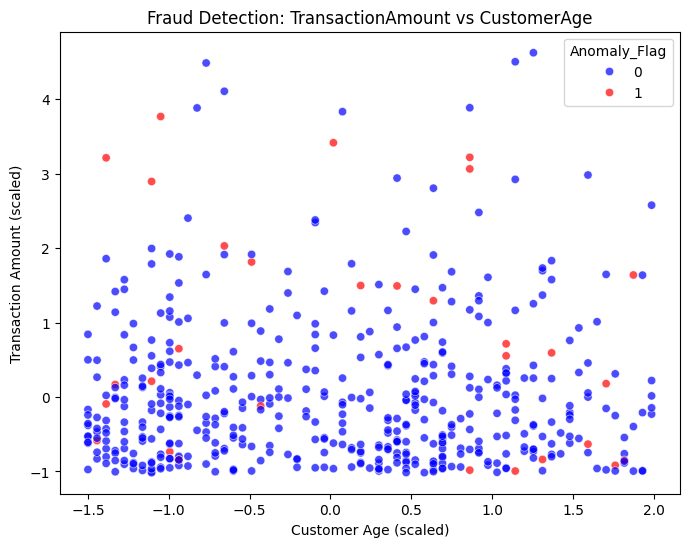

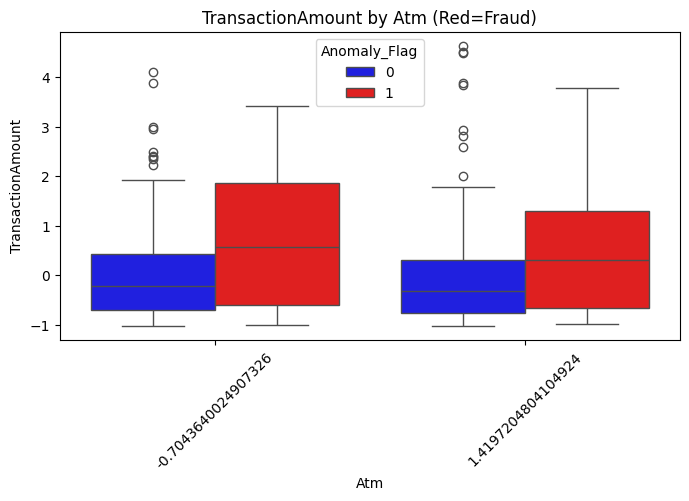

<Figure size 640x480 with 0 Axes>

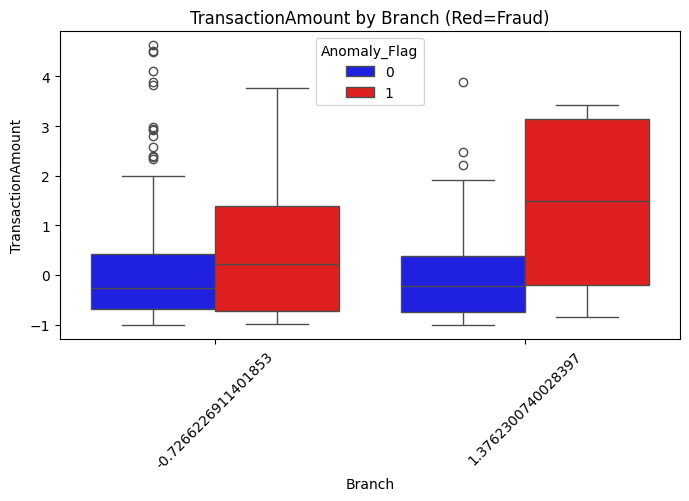

<Figure size 640x480 with 0 Axes>

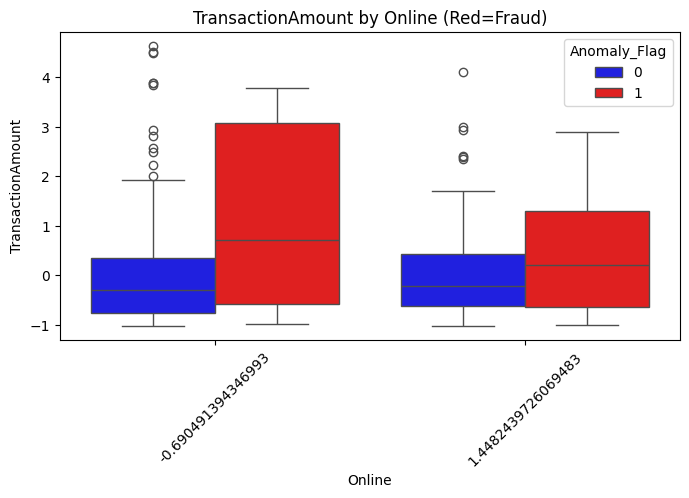

<Figure size 640x480 with 0 Axes>

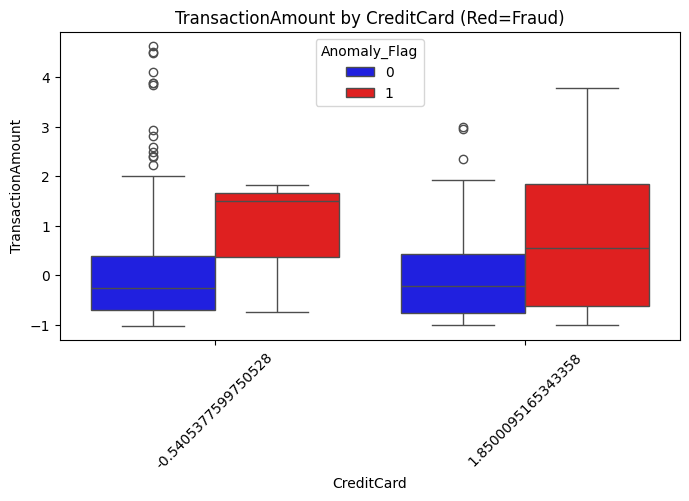

<Figure size 640x480 with 0 Axes>

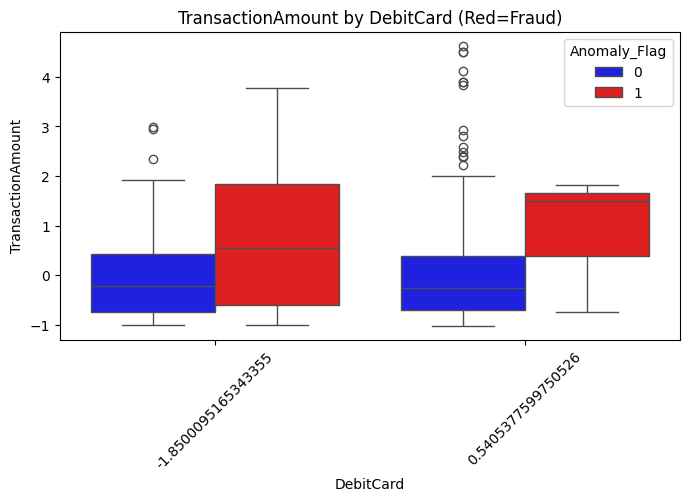

<Figure size 640x480 with 0 Axes>

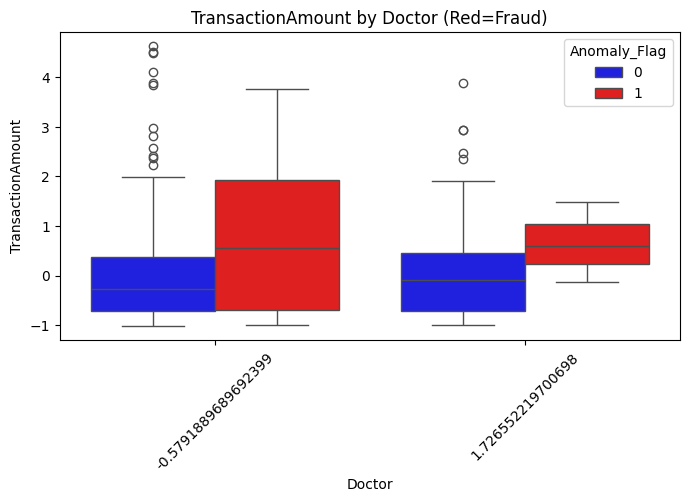

<Figure size 640x480 with 0 Axes>

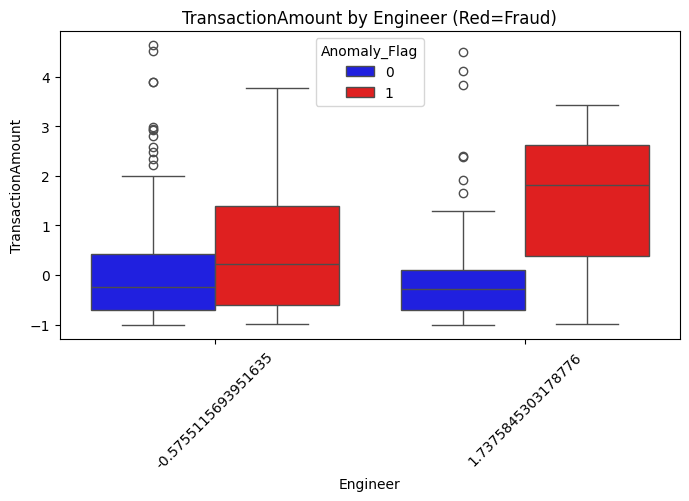

<Figure size 640x480 with 0 Axes>

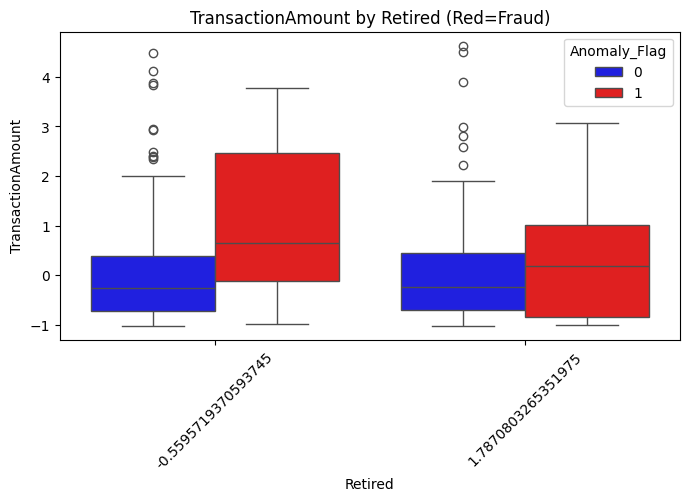

<Figure size 640x480 with 0 Axes>

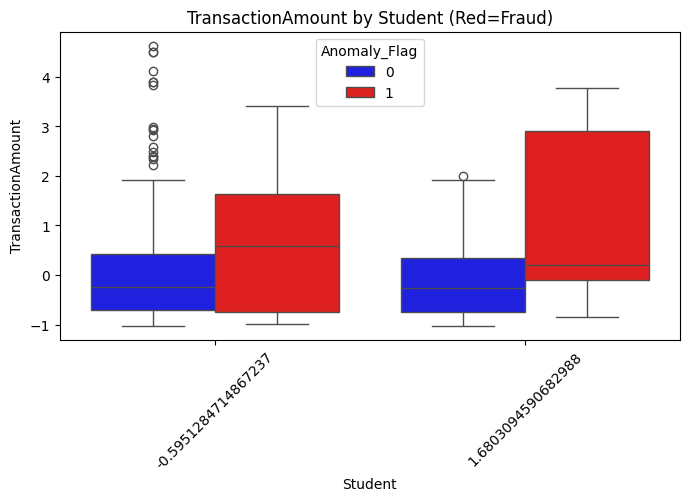

<Figure size 640x480 with 0 Axes>

In [81]:
# Scatter plot: TransactionAmount vs CustomerAge
plt.figure(figsize=(8,6))
sns.scatterplot(x='CustomerAge', y='TransactionAmount', hue='Anomaly_Flag',
                data=X_test, palette={0:'blue', 1:'red'}, alpha=0.7)
plt.title("Fraud Detection: TransactionAmount vs CustomerAge")
plt.xlabel("Customer Age (scaled)")
plt.ylabel("Transaction Amount (scaled)")
plt.show()

# Boxplots for TransactionAmount across categorical variables
categorical_cols = ['Atm', 'Branch', 'Online', 'CreditCard', 'DebitCard', 'Doctor', 'Engineer', 'Retired', 'Student']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y='TransactionAmount', data=X_test, hue='Anomaly_Flag', palette={0:'blue',1:'red'})
    plt.title(f"TransactionAmount by {col} (Red=Fraud)")
    plt.xticks(rotation=45)
    plt.show()
    plt.tight_layout()


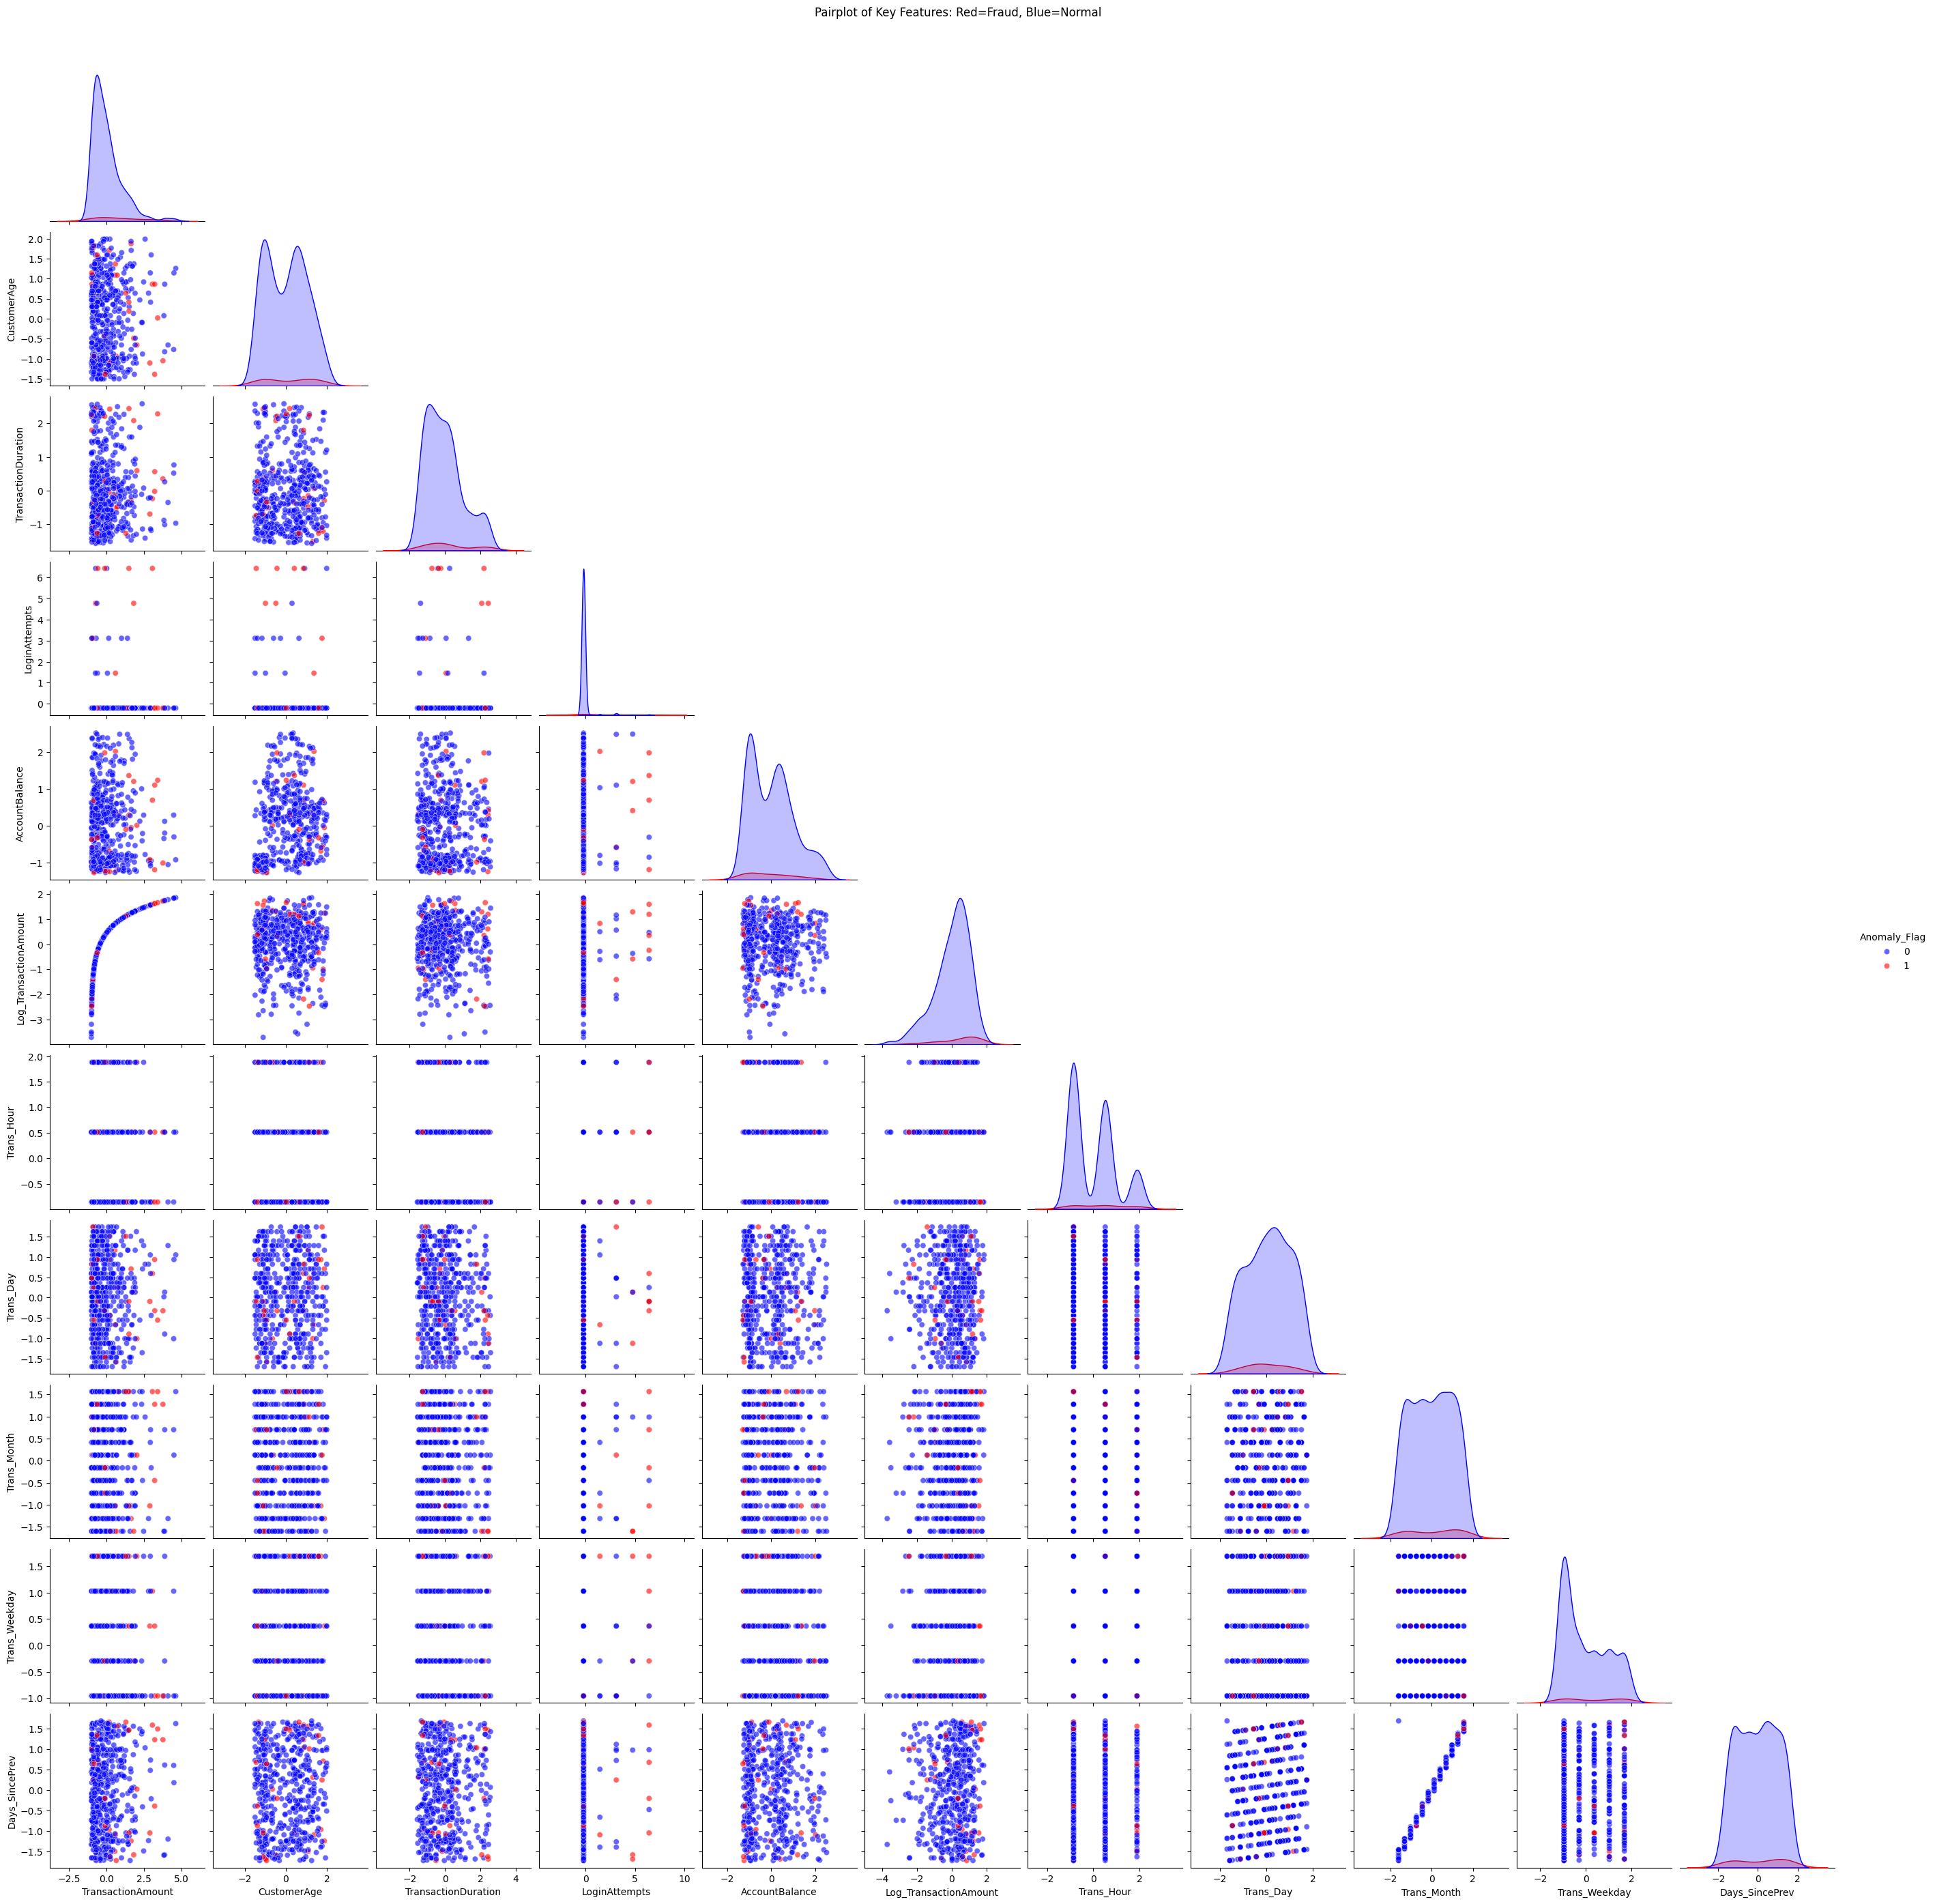

<Figure size 640x480 with 0 Axes>

In [83]:
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                'LoginAttempts', 'AccountBalance', 'Log_TransactionAmount',
                'Trans_Hour', 'Trans_Day', 'Trans_Month', 'Trans_Weekday', 'Days_SincePrev']

# Add Anomaly_Flag to the subset
plot_data = X_test[numeric_cols + ['Anomaly_Flag']]

# Pairplot: color by Anomaly_Flag
sns.pairplot(plot_data, hue='Anomaly_Flag', palette={0:'blue',1:'red'}, corner=True, plot_kws={'alpha':0.6})
plt.suptitle("Pairplot of Key Features: Red=Fraud, Blue=Normal", y=1.02)
plt.show()
plt.tight_layout()

# Financial Fraud Detection Project – SecurePay Analytics

## Project Overview
As part of the Data Risk & Compliance team at SecurePay Analytics, our goal was to detect unusual or fraudulent credit card transactions using unsupervised machine learning techniques. The client provided an anonymized transaction dataset containing numeric and categorical features, including transaction amounts, customer age, transaction time, account balance, and encoded user types.

---

## Data Preparation
- Selected **all numeric and encoded categorical features** for modeling.  
- Scaled numeric features using `StandardScaler` to normalize ranges.  
- Ensured data quality by handling missing values and verifying correct encoding.  
- Split the dataset into **train (80%)** and **test (20%)** sets.

---

## Exploratory Data Analysis (EDA)
- Conducted **scatter plots** of `TransactionAmount` vs `CustomerAge` to visualize unusual transactions.  
- Used **boxplots** for categorical features (e.g., `CreditCard`, `Online`, `Student`) to identify feature-level anomalies.  
- Observed that anomalies are rare (~5–6% of transactions), consistent with real-world fraud rates.

---

## Machine Learning Model
- Implemented **Isolation Forest** for unsupervised anomaly detection:
  - `contamination=0.05` to detect ~5% of transactions as anomalies.
  - Trained on the training set and predicted anomalies on the test set.
- Added `Anomaly_Flag` to classify transactions as:
  - `1` = Fraud/Anomalous  
  - `0` = Normal
- Computed **anomaly scores** using `decision_function()` for ranking suspicious transactions.

**Results:**
- Test set contained **503 transactions**, of which **30 were flagged as anomalies** (~6%).  
- Top suspicious transactions were sorted by **lowest anomaly scores**, enabling focused inspection.

---

## Visualization & Insights
- **Scatter Plot:** `TransactionAmount` vs `Anomaly Score` highlighted fraudulent transactions in red.  
- **Boxplots:** Showed anomalies concentrated in certain categorical groups, e.g., online transactions and specific user types.  
- **Heatmap:** Illustrated deviations in numeric features across flagged transactions.  

**Key Observations:**
- Anomalies often have unusually high or low transaction amounts relative to their user segment.  
- Certain transaction channels (e.g., `Online`, `CreditCard`) showed higher concentration of anomalies.  
- Visual inspection combined with anomaly scores effectively highlighted potential fraud patterns.

---

## Conclusion
The Isolation Forest model successfully identified rare and potentially fraudulent transactions in the dataset. With visualizations and anomaly scores, we can prioritize high-risk transactions for investigation. This unsupervised ML approach provides a **scalable, data-driven solution** for financial fraud detection, ready to be integrated into a broader fraud monitoring system.

---
